In [1]:
import xarray as xr
import matplotlib
import xesmf as xe
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
from netCDF4 import Dataset
import matplotlib.patches as mpatches
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords, CoordPair, GeoBounds)
import proplot as pplt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
pplt.rc['figure.facecolor'] = 'white'
pplt.rc['label.size'] = 14
pplt.rc['tick.labelsize'] = 16

In [4]:
wrf_path = '/glade/u/home/cab478/hrldas_resources/resources/wrfinput_d01'

# Open the NetCDF file
ncfile = Dataset(wrf_path)
dummy  = getvar(ncfile, "SHDMAX")
cart_proj  = get_cartopy(dummy)

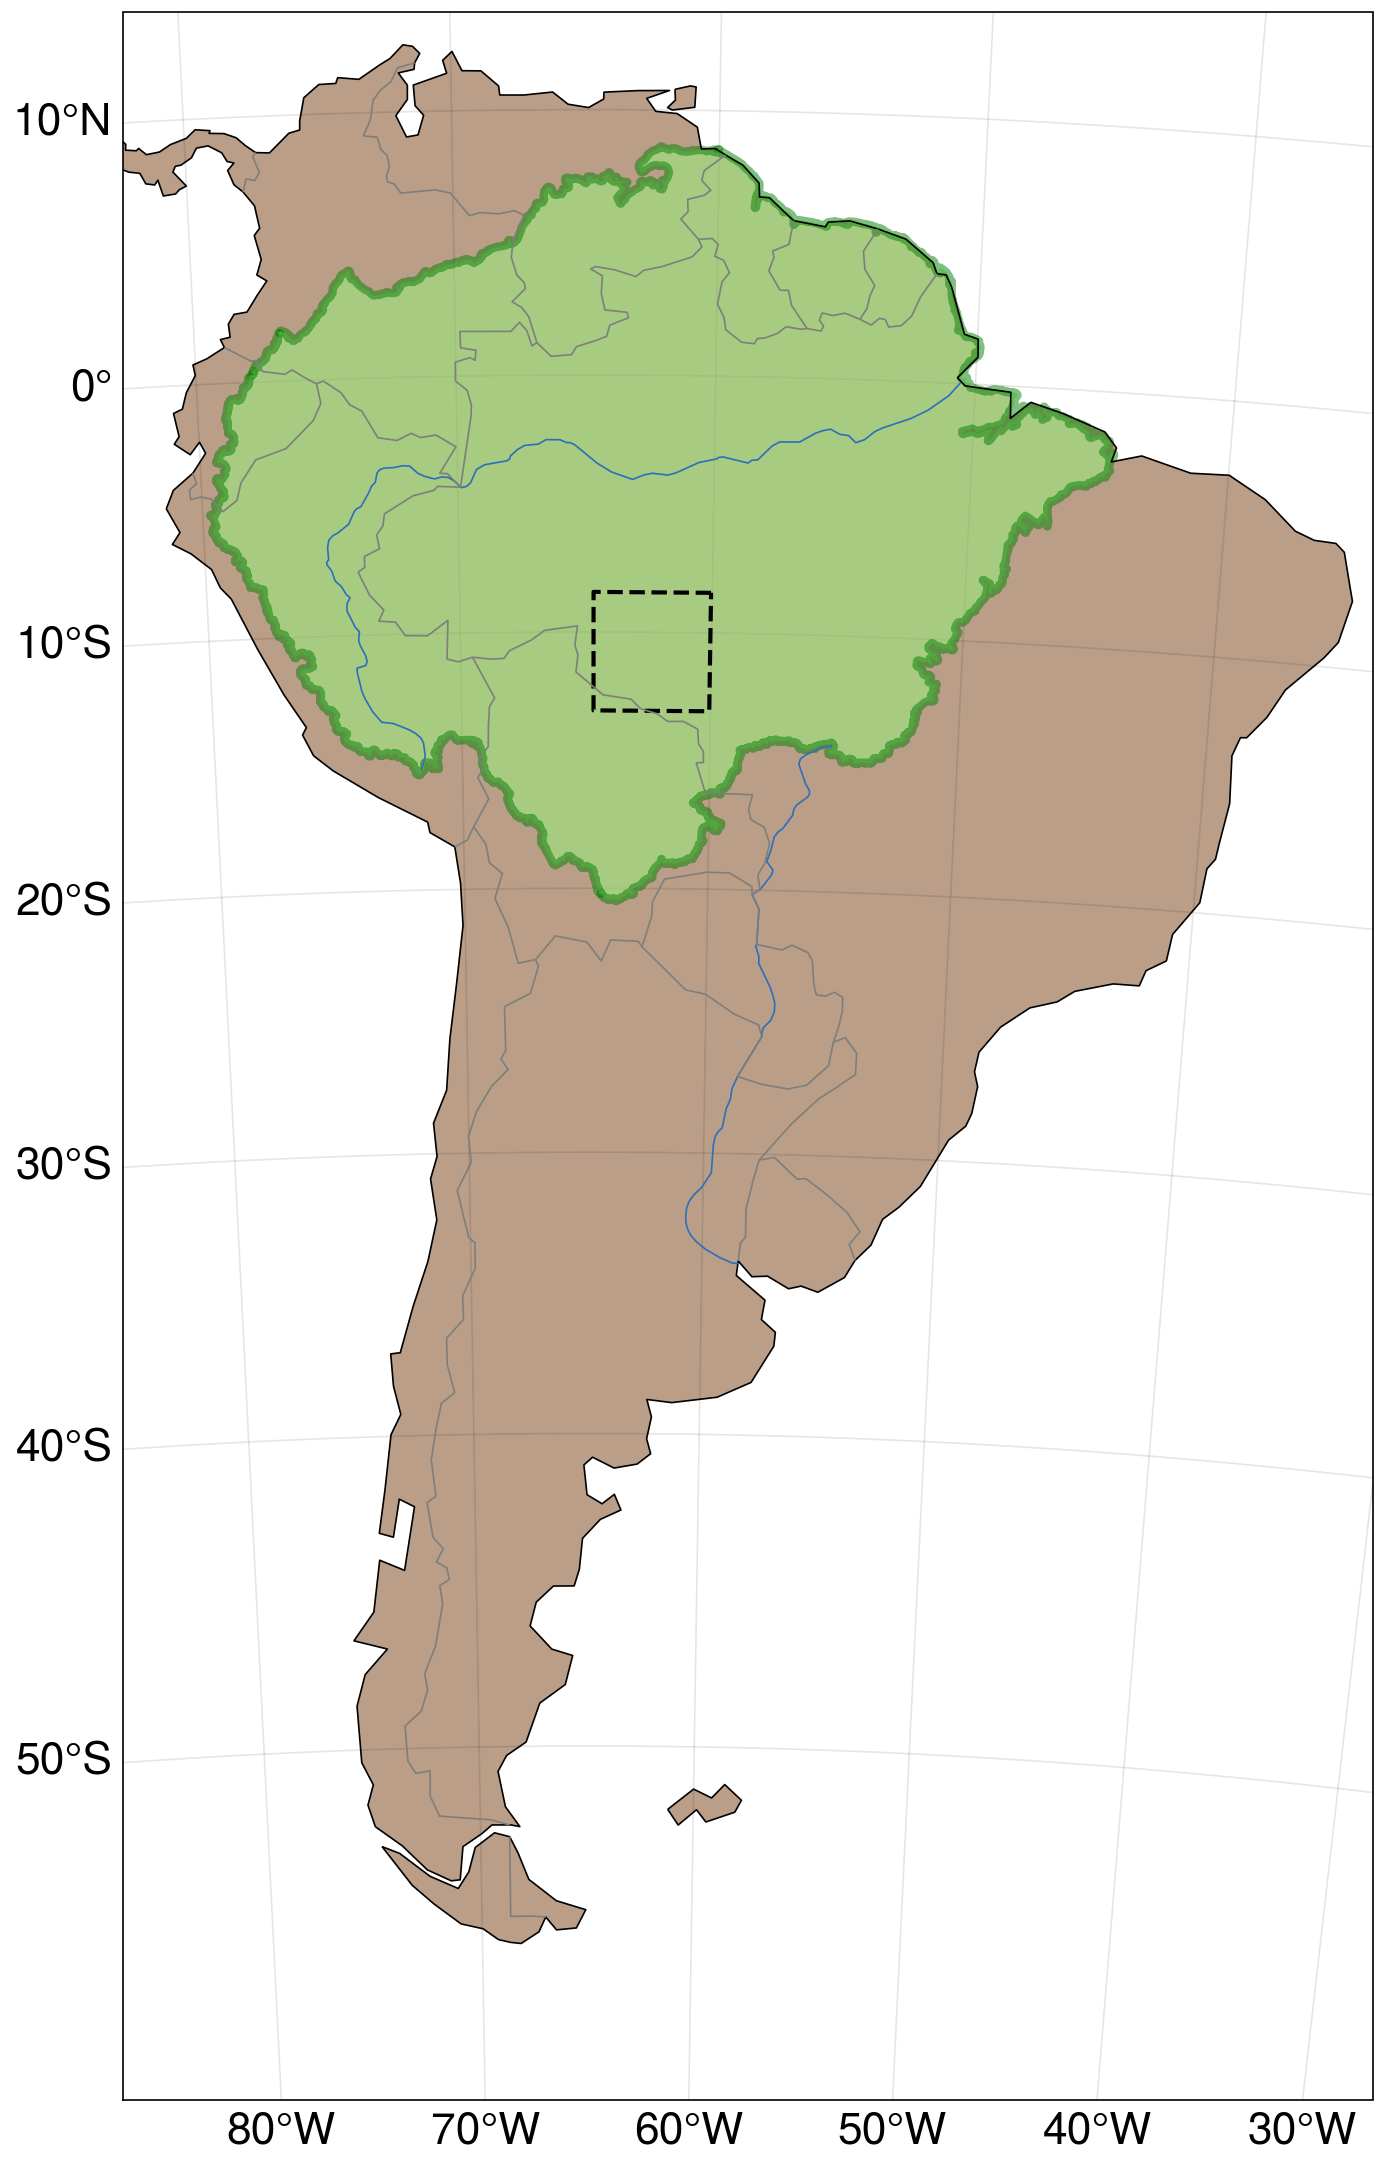

In [6]:
fig = pplt.figure(refwidth='50em')
axs = fig.subplots(nrows=1, proj=cart_proj)

fname_lp = 'amazon_sensulatissimo_gmm_v1.shp'
lpb = ShapelyFeature(Reader(fname_lp).geometries(),
                     crs.PlateCarree(), edgecolor='green', facecolor='light green', alpha=0.5, lw=3)

axs.add_feature(lpb)

axs.format(
    land=True, coast=True, borders=True, rivers=True, 
    riverscolor='medium blue', borderscolor='medium grey', 
    landcolor='mushroom', lonlim=(-82,-36), latlim=(14, -59), labels=True
)


axs.plot([-60.05, -64.7, -64.7, -60.05, -60.05], [-8.43, -8.43, -13.07, -13.07, -8.43], '--',
         color='black', linewidth=1.5,
         )
plt.show()